<a href="https://colab.research.google.com/github/SudeepSarkar/Undergraduate-Computer-Vision/blob/main/CAP_4410_Lecture_6_Image_Pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, Sudeep Sarkar, University of South Florida, Tampa

# Image Pyramids

* Section 3.5 (second edition)

* Good filters for changing image resolution, i.e., up-sampling (interpolation) and down-sampling (decimation).

* An image pyramid is an representation built for one image. Starting from the original resolution, we progressively down-sample it until some desired stopping size is reached.

* Complete hierarchy of differently sized images enable a variety of applications: reduce and expand image size, blend images, find objects in image, fast matching of objects.


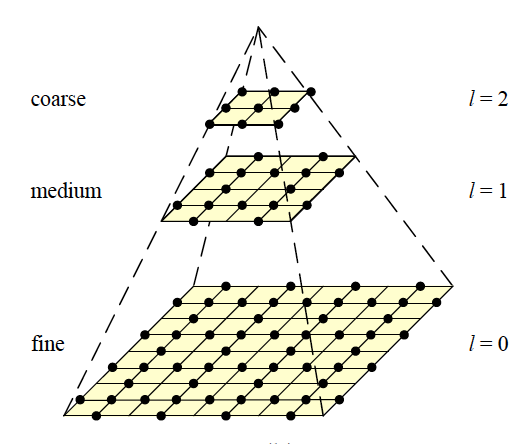

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from skimage.color import rgb2gray

from scipy import ndimage as scimage
# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
# https://www.scipy.org/

np.set_printoptions(precision=2)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/'

Mounted at /content/drive
 apple.jpg				     mountain_peak_1.png
'Armes 1.png'				     mountain_peak_2.png
'Armes 2.png'				     parking_lot_meva_1.png
 declaration_of_independence_stone_630.jpg   parking_lot_meva_2.png
 Fig3_3a.jpg				     parking_lot_meva_3.png
 Fig3_4a.jpg				    'Superbowl 2021_1.png'
 Fig3_4c.jpg				    'Superbowl 2021_2.png'
 house_1.png				    'Superbowl 2021_3.png'
 house_2.png				     Total-Text-Dataset
 lizard.jpg				     Total-Text-Dataset.zip


# Image pyramid construction by downsampling and upsampling using splines

In [ ]:
# Python snipet to generate (x, y) location pairs for all pixels in an image.

x, y = np.meshgrid(np.arange(3), np.arange(4))

print('np.arange(3)=', np.arange(3), '\nnp.arange(4)=', np.arange(4), '\nx=', x.reshape(-1), '\ny=1', y.reshape(-1))

np.arange(3)= [0 1 2] 
np.arange(4)= [0 1 2 3] 
x= [0 1 2 0 1 2 0 1 2 0 1 2] 
y=1 [0 0 0 1 1 1 2 2 2 3 3 3]


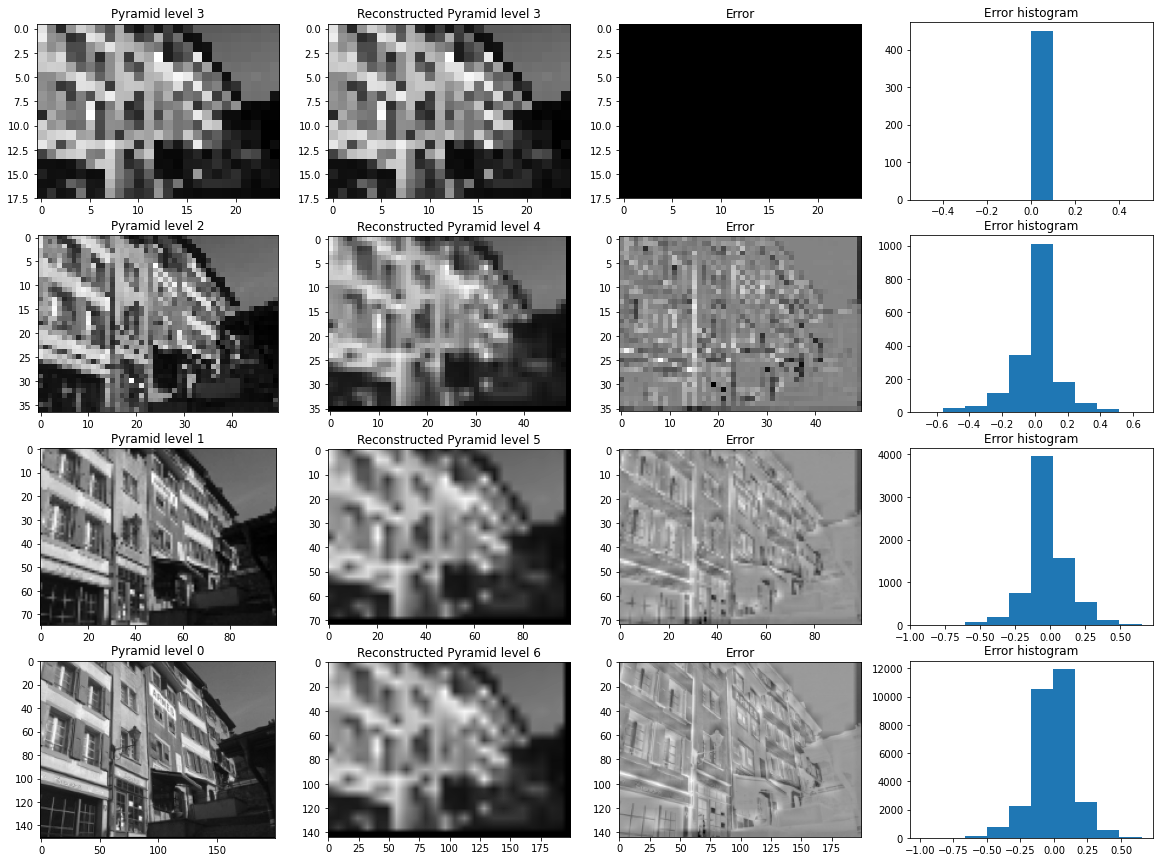

In [4]:
def scale_image (in_image,  scale, sample_order) :
    # Scales in_image size using "scale" factor. Interpolaton of pixels is done using scimage.map_coordinates.
    # "sample_order" specifies the order of the spline interpolation function used.
    height_out, width_out = in_image.shape
    height_out = np.int(height_out * scale)
    width_out = np.int(width_out * scale)

    out_image = np.zeros((height_out, width_out))

    gy, gx = np.meshgrid(np.arange(height_out), np.arange(width_out))
    fx = gx/scale
    fy = gy/scale
    values = scimage.map_coordinates( in_image, [fy, fx], order = sample_order)
    out_image[gy, gx] = values
    
    return(out_image)
#------------------display-----------------------------------------

# Load an color image in grayscale
img = io.imread('//content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/Armes 1.png')
img = rgb2gray(img)
num_levels = 4
factor = 2.0
# Create image (up) pyramid by downscaling the image by factor
pyramid = []
pyramid.append(img)
for i in range (num_levels) :
    pyramid.append(scale_image (pyramid[-1], 1/factor, 1)) 

# Create the down pyramid by upscaling from the top of the pyramid
down_pyramid = []
down_pyramid.append(pyramid[-1])
for i in range (num_levels) :
    down_pyramid.append(scale_image (down_pyramid[-1], factor, 1)) 

#------------------display-----------------------------------------

fig, axs = plt.subplots(nrows=4, ncols=4)

fig.set_size_inches (20, 15)

for i in range (num_levels) :
    axs[i, 0].imshow(pyramid[-(i+1)], 'gray')
    axs[i, 0].set_title('Pyramid level {}'.format(num_levels-i-1))

for i in range (num_levels) :
    axs[i, 1].imshow(down_pyramid[i], 'gray')
    axs[i, 1].set_title('Reconstructed Pyramid level {}'.format(i+num_levels-1))


for i in range (num_levels) :
    # compute error between the reconstructed images at each level from pervious levels
    # problem is that the arrays sizes might be off by 1 due to rounding off during upscaling and downscaling
    h1, w1 = down_pyramid[i].shape
    h2, w2 = pyramid[-(i+1)].shape
    h3 = np.min([h1, h2])
    w3 = np.min([w1, w2])
    #print(h1, w1, h2, w2, h3, w3)
    reconstruction_error = down_pyramid[i][0:h3,0:w3] - pyramid[-(i+1)][0:h3,0:w3]
    axs[i, 2].imshow(reconstruction_error, 'gray')
    axs[i, 3].hist(reconstruction_error.reshape(-1))
    axs[i, 2].set_title('Error')
    axs[i, 3].set_title('Error histogram')




# Homework

Try changing the order of interpolation used during sampling in the above code and describe the change in the error of the reconstructed images.

# Upsampling and downsampling using convolutions


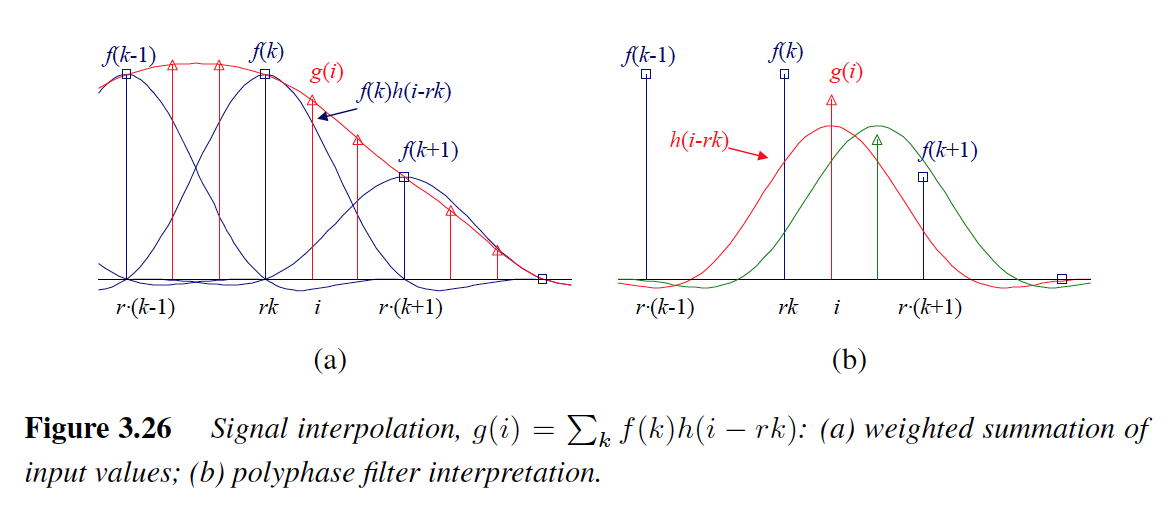

* Interpolation (upsampling) can be implemented as a convolution function.

* The above figure is an illustration. Imagine the kernel function $h()$ placed at each sample of the $f()$ function, scaled by the corresponding value of the function. The output is the sum of all these functions.

* In 2D, this function will be

\begin{equation}
g(i, j) = \sum_{k, l} f(k, l) h(i - rk, j - rl)
\end{equation}

* This equation is similar to the earlier convolution equation that we had seen, except for the multiplication of the $k$ and $l$ indices using $r$.

* For up sampling by a factor of 2 this equation is the following. Note we are considering every other sample of the $h$ function.

\begin{equation}
g(i, j) = \sum_{k, l} f(k, l) h(i - 2k, j - 2l)
\end{equation}

* The obove is equivalent to the following

\begin{equation}
g(i, j) = \sum_{k, l} f'(k, l) h(i - k, j - l)
\end{equation}

> where $f'(k, l)$ is constructed out of $f(k, l)$ by intersecting zeros between adjacent samples.


* Some typical interpolating kernels include

> 1. Box-3 function 
\begin{equation}
h  = \frac{1}{9 r} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1\\ 1 & 1 & 1 \end{bmatrix}
\end{equation}


1D linear interpolator [[0.5 1.  0.5]]
2D bi-linear interpolator
 [[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]


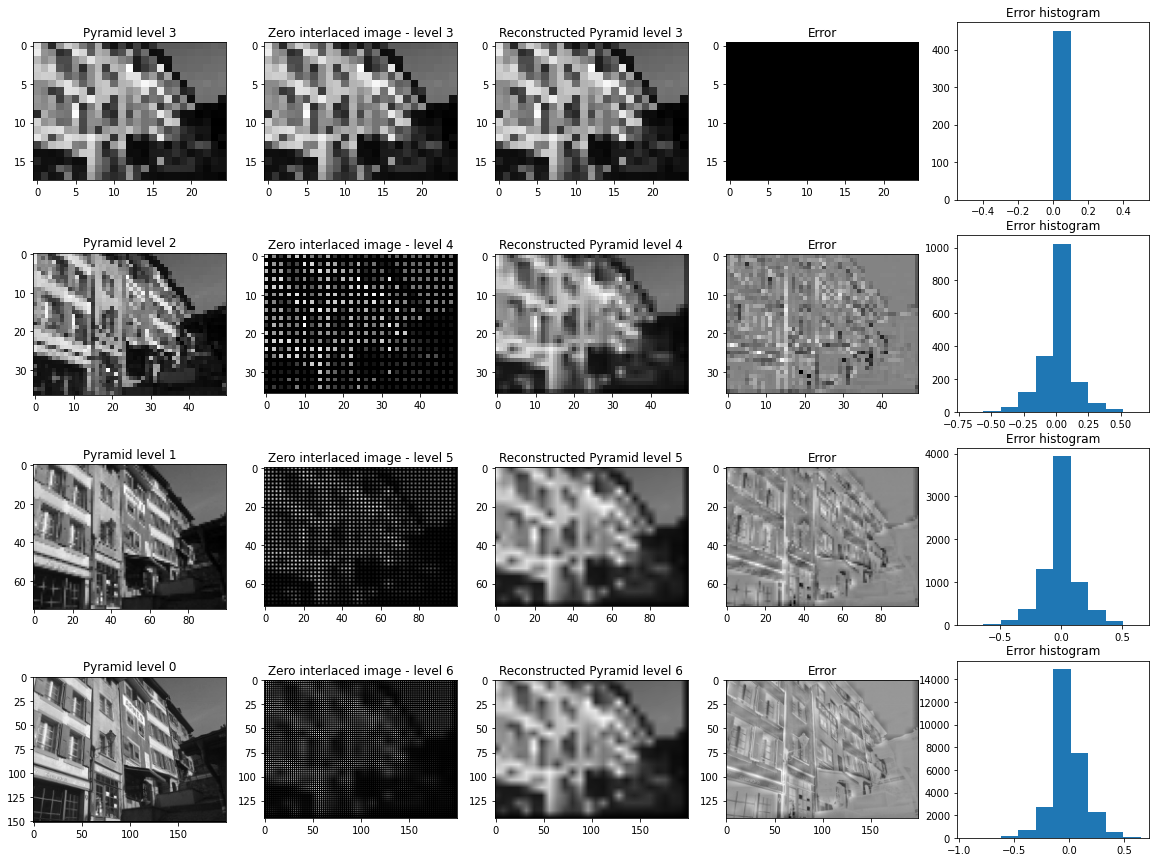

In [7]:
import scipy.signal

factor = 2;          # upsampling ratio
h   = scipy.signal.convolve2d(np.ones((1, factor)),np.ones((1, factor)))/factor;  # 1D linear interpolator (triangle, plot it and see).
hBL = h.transpose()*h;      # 2D bi-linear interpolator.

print('1D linear interpolator', h)
print('2D bi-linear interpolator\n', hBL)

# Create the down pyramid by upscaling from the top of the pyramid
down_pyramid = []
f_prime = []
down_pyramid.append(pyramid[-1])
f_prime.append(pyramid[-1])

for i in range (num_levels) :
    m,n = down_pyramid[-1].shape
    out = np.zeros((2*m,2*n),dtype=down_pyramid[-1].dtype)
    out[::2,::2] = down_pyramid[-1]
    f_prime.append(out)
    down_pyramid.append(scipy.signal.convolve2d(out, hBL, mode = 'same')) 

#------------------display-----------------------------------------

fig, axs = plt.subplots(nrows=4, ncols=5)

fig.set_size_inches (20, 15)

for i in range (num_levels) :
    axs[i, 0].imshow(pyramid[-(i+1)], 'gray')
    axs[i, 0].set_title('Pyramid level {}'.format(num_levels-i-1))

for i in range (num_levels) :
    axs[i, 1].imshow(f_prime[i], 'gray')
    axs[i, 1].set_title('Zero interlaced image - level {}'.format(i+num_levels-1))


for i in range (num_levels) :
    axs[i, 2].imshow(down_pyramid[i], 'gray')
    axs[i, 2].set_title('Reconstructed Pyramid level {}'.format(i+num_levels-1))


for i in range (num_levels) :
    # compute error between the reconstructed images at each level from pervious levels
    # problem is that the arrays sizes might be off by 1 due to rounding off during upscaling and downscaling
    h1, w1 = down_pyramid[i].shape
    h2, w2 = pyramid[-(i+1)].shape
    h3 = np.min([h1, h2])
    w3 = np.min([w1, w2])
    #print(h1, w1, h2, w2, h3, w3)
    reconstruction_error = down_pyramid[i][0:h3,0:w3] - pyramid[-(i+1)][0:h3,0:w3]
    axs[i, 3].imshow(reconstruction_error, 'gray')
    axs[i, 3].set_title('Error')
    axs[i, 4].hist(reconstruction_error.reshape(-1))
    axs[i, 4].set_title('Error histogram')


# Downsampling

* The current strategy of reducing the size essentially picks every other pixel in the image to reduce the image size. This introduces an effect called *aliasing*. See the edges of building to see what this effect looks like.

* A better strategy is to smooth the image (or low-pass filter the image) and then select subsample it.

* Convolve with $h()$ and then sample every $r$-th pixel

\begin{equation}
g(i, j) = \sum_{k, l} f(k, l) h(ri - k, kj - l)
\end{equation}

* One common filter used is the Gaussian filter, thus creating the **Gaussian Pyramid**.

Gaussian 2D
 [[0.   0.02 0.02 0.02 0.  ]
 [0.02 0.06 0.09 0.06 0.02]
 [0.02 0.09 0.14 0.09 0.02]
 [0.02 0.06 0.09 0.06 0.02]
 [0.   0.02 0.02 0.02 0.  ]]
1D linear interpolator [[0.12 0.5  0.75 0.5  0.12]]
2D bi-linear interpolator
 [[0.02 0.06 0.09 0.06 0.02]
 [0.06 0.25 0.38 0.25 0.06]
 [0.09 0.38 0.56 0.38 0.09]
 [0.06 0.25 0.38 0.25 0.06]
 [0.02 0.06 0.09 0.06 0.02]] 4.0


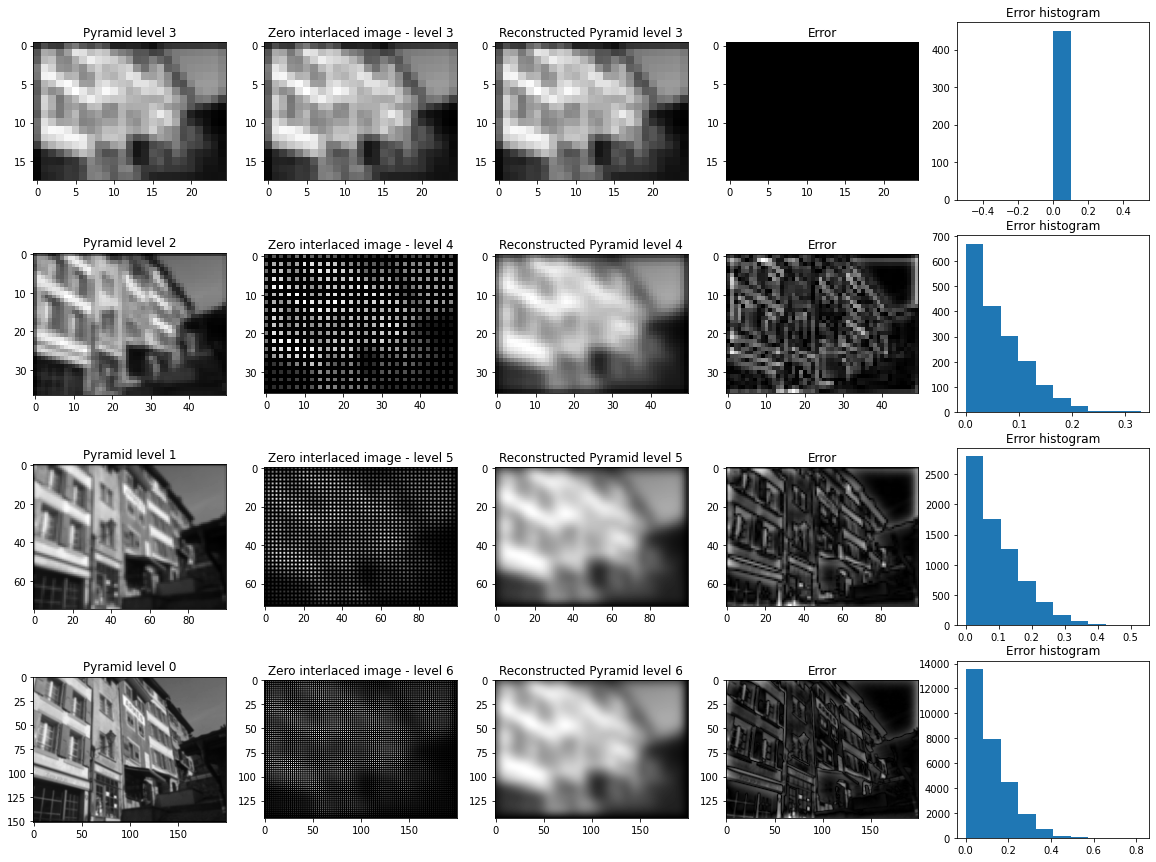

In [9]:
import scipy.signal

def gaussian (sigma):
    x = np.arange(np.int(-3*sigma), np.int(3*sigma)+1)
    g = np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma))
    return (g/g.sum())

g = np.expand_dims(gaussian(0.5), 0)

g = np.array([[1/8, 1/2, 3/4, 1/2, 1/8]])/2 
# Binomial, approximately Gaussian shaped. 
# This is an option popularized by Burt and Adelson, See http://persci.mit.edu/pub_pdfs/pyramid83.pdf

g_2D = g.transpose()*g;      # 2D Gaussian
print('Gaussian 2D\n', g_2D)

num_levels = 4
factor = 2
# Create image (up) pyramid by downscaling the image by factor
pyramid = []
pyramid.append(img)
for i in range (num_levels) :
    gaussian_smoothed = scipy.signal.convolve2d(pyramid[-1], g_2D, mode = 'same')
    pyramid.append(scale_image (gaussian_smoothed, 1/factor, 1)) 



# Create the down pyramid by upscaling from the top of the pyramid

h   = scipy.signal.convolve2d(np.ones((1,factor)),np.ones((1,factor)))/factor;  # 1D linear interpolator (triangle, plot it and see).

h = np.array([[1/8, 1/2, 3/4, 1/2, 1/8]]) # Binomial filter used by  Burt and Adelson
hBL = h.transpose()*h; 

print('1D linear interpolator', h)
print('2D bi-linear interpolator\n', hBL, np.sum(hBL))

down_pyramid = []
f_prime = []
down_pyramid.append(pyramid[-1])
f_prime.append(pyramid[-1])

for i in range (num_levels) :
    m,n = down_pyramid[-1].shape
    out = np.zeros((2*m,2*n),dtype=down_pyramid[-1].dtype)
    out[::2,::2] = down_pyramid[-1]
    f_prime.append(out)
    down_pyramid.append(scipy.signal.convolve2d(out, hBL, mode = 'same')) 

#------------------display-----------------------------------------

fig, axs = plt.subplots(nrows=4, ncols=5)

fig.set_size_inches (20, 15)

for i in range (num_levels) :
    axs[i, 0].imshow(pyramid[-(i+1)], 'gray')
    axs[i, 0].set_title('Pyramid level {}'.format(num_levels-i-1))

for i in range (num_levels) :
    axs[i, 1].imshow(f_prime[i], 'gray')
    axs[i, 1].set_title('Zero interlaced image - level {}'.format(i+num_levels-1))


for i in range (num_levels) :
    axs[i, 2].imshow(down_pyramid[i], 'gray')
    axs[i, 2].set_title('Reconstructed Pyramid level {}'.format(i+num_levels-1))


for i in range (num_levels) :
    # compute error between the reconstructed images at each level from pervious levels
    # problem is that the arrays sizes might be off by 1 due to rounding off during upscaling and downscaling
    h1, w1 = down_pyramid[i].shape
    h2, w2 = pyramid[-(i+1)].shape
    h3 = np.min([h1, h2])
    w3 = np.min([w1, w2])
    #print(h1, w1, h2, w2, h3, w3)
    reconstruction_error = np.abs(down_pyramid[i][0:h3,0:w3] - pyramid[-(i+1)][0:h3,0:w3])
    axs[i, 3].imshow(reconstruction_error, 'gray')
    axs[i, 3].set_title('Error')
    axs[i, 4].hist(reconstruction_error.reshape(-1))
    axs[i, 4].set_title('Error histogram')




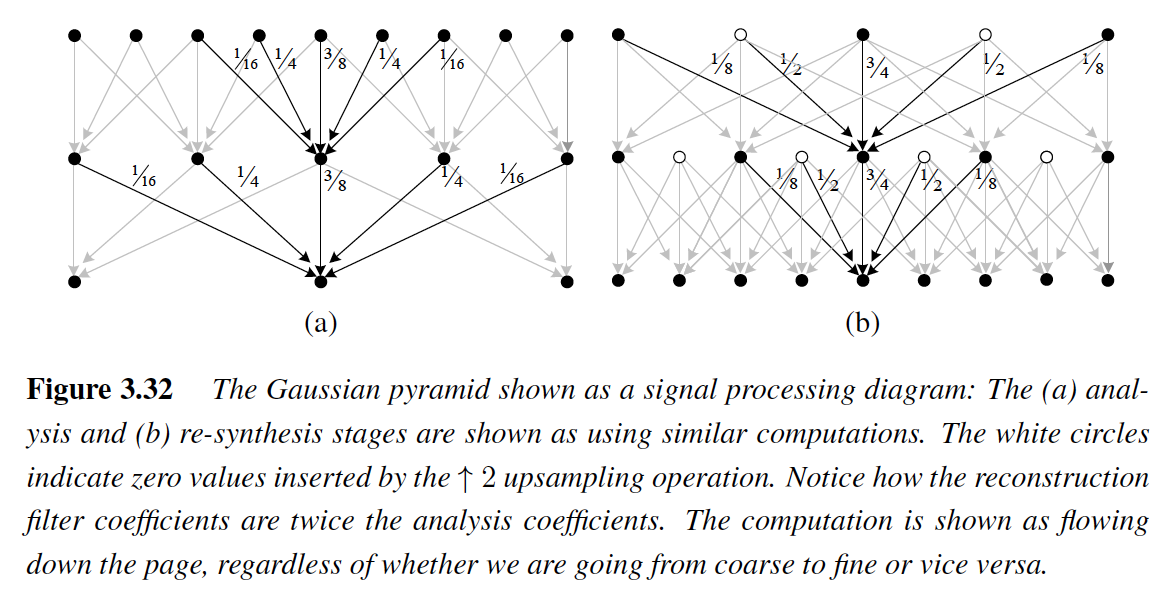

# Scale-space

* The scale space of an image is a **continuous** function $L(x,y,\sigma)$ produced from the convolution of a Gaussian kernel (at different scales) with the input image.

\begin{eqnarray}
L(x,y,\sigma) & = & f(x, y) \star G(x, y, \sigma) \\
&  = & \int_x \int_y f(u, v) G(u - x, v - y, \sigma) dx dy
\end{eqnarray}

>> See ([Lindeberg, 1998](https://people.kth.se/~tony/papers/cvap222.pdf)) for a detailed mathematical exposition of the important concept of scale.

* Under various assumptions, the best function for creating an image scale space is a Gaussian function. 

* An important property is

\begin{eqnarray}
\frac{\partial}{\partial \sigma} G(x, y, \sigma) & = & \sigma \nabla^2 G(x, y, \sigma) \\
& \approx & \frac{G(x, y, k\sigma) - G(x, y, \sigma)}{(k-1)\sigma} \\
G(x, y, k\sigma) - G(x, y, \sigma) & \approx & (k-1)\sigma^2 \nabla^2 G(x, y, \sigma)
\end{eqnarray}

* Here is the mathematical reason why the difference of Gaussian (DoG) was similar to the Laplacian of Gaussian (LoG) output we had observed earlier.

* Ideally, $k$ should be small. For the current purposes $k=2^{\frac{1}{s}}$ performed well, with $s=3$.

* In practice, we use a discretized version of the scale space, called the image pyramid. 

